In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [12]:
from google.colab import files
uploaded = files.upload()

Saving random_forest.csv to random_forest (1).csv


In [13]:
import io
for fn in uploaded.keys():
  print(f'random_forest.csv"{fn}" with length {len(uploaded[fn])} bytes')
  # To read a CSV file into a pandas DataFrame:
  df = pd.read_csv(io.BytesIO(uploaded[fn]))
  print(df)

random_forest.csv"random_forest (1).csv" with length 913746 bytes
      CustomerID  Churn  ChildrenInHH  HandsetRefurbished  HandsetWebCapable  \
0        3000002   True         False               False               True   
1        3000010   True          True               False              False   
2        3000014  False          True               False              False   
3        3000022  False         False               False               True   
4        3000023  False         False               False               True   
...          ...    ...           ...                 ...                ...   
1517     3001536   True         False               False               True   
1518     3001537  False          True               False              False   
1519     3001538   True         False               False              False   
1520     3001539  False         False               False              False   
1521     3001540   True         False                T

Create Labeled Examples

In [14]:
y = df['Churn']
X = df.drop(columns = 'Churn', axis=1)

Split Labeled Examples Into Training and Test Sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

 **Fit Two Random Forest Classifiers**

 The random forest (RF) algorithm is probably the most well known and utilized implementation of the bagging technique. A RF is an ensemble of decision trees, where both bagging and random feature selection are used to reduce the variance of the forest.

In [16]:
print('Begin Random Forest Implementation...')
# 1. Create the RandomForestClassifier model object below and assign to variable 'rf_20_model'

rf_20_model = RandomForestClassifier(criterion='entropy', n_estimators=20)

# 2. Fit the model to the training data below

rf_20_model.fit(X_train, y_train)

# 3. Make predictions on the test data using the predict_proba() method and assign the result to a
# list named 'rf_20_predictions' below

rf_20_predictions = rf_20_model.predict_proba(X_test)[:, 1].tolist()

# 4. Create the RandomForestClassifier model object below and assign to variable 'rf_100_model'

rf_100_model = RandomForestClassifier(criterion='entropy', n_estimators=100)

# 5. Fit the model to the training data below

rf_100_model.fit(X_train, y_train)

# 6. Make predictions on the test data using the predict_proba() method and assign the result to a
# list named 'rf_100_predictions' below

rf_100_predictions = rf_100_model.predict_proba(X_test)[:, 1].tolist()

print('End')

Begin Random Forest Implementation...
End


**Evaluate the Performance Using ROC and AUC**

We will now plot two ROC curves for the two RF classifiers on the same graph.

In [17]:
print('Computing ROC Curve...')

#1. Use roc_curve to record fpr and tpr for rf_20_model
fpr_20, tpr_20, thresholds_20 = roc_curve(y_test, rf_20_predictions)

#2. Use roc_curve to record fpr and tpr for rf_100_model
fpr_100, tpr_100, thresholds_100 = roc_curve(y_test, rf_100_predictions)

print('End')

Computing ROC Curve...
End


Plotting ROC Curve...


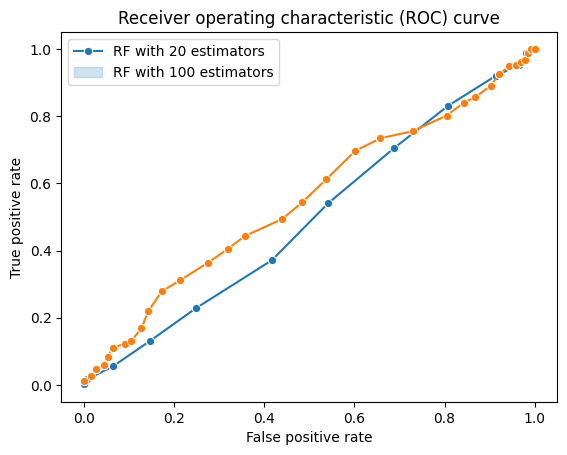

In [18]:
print('Plotting ROC Curve...')

fig = plt.figure()
ax = fig.add_subplot(111)


sns.lineplot(x=fpr_20, y=tpr_20, marker = 'o')
sns.lineplot(x=fpr_100, y=tpr_100, marker = 'o')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['RF with 20 estimators', 'RF with 100 estimators'])
plt.show()


auc() function to compute the areas under each of the receiver operating characteristic (ROC) curves.

In [19]:
#1. AUC for rf_20_model
auc_20 = auc(fpr_20, tpr_20)

print("AUC of the RF model with 20 estimators is {:.3f}".format(auc_20))

# 2. AUC for rf_100_model
auc_100 = auc(fpr_100, tpr_100)

print("AUC of the RF model with 100 estimators is {:.3f}".format(auc_100))


AUC of the RF model with 20 estimators is 0.494
AUC of the RF model with 100 estimators is 0.550
